# Data Science 
## Supervised Learning I
### Case Study 3

### Objectives: 
* Learn to handle, preprocess, and encode categorical and numerical data for predictive modeling.
* Learn to build, evaluate, and fine-tune supervised learning models (Logistic Regression, Decision Tree, Random Forest) for classification tasks.
* Learn to analyze model performance using metrics such as accuracy, precision, recall, F1-score and cross-validation.
* Learn to visualize and interpret decision-making processes through Decision Tree plots and feature importance analysis.
* Learn to apply techniques such as class weighting and SMOTE to tackle imbalanced datasets, ensuring better model generalization.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('loan_borowwer_data.csv')
print("Data information: ")
data.info()

# Check Missing Values
# Count missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

print("\nPrint the first 5 rows:")
print(data.head())

Data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
Missing Values:
 credit.policy        0
purp

### Understanding the Data
This dataset contains 9578 entries (borrowers) and 14 features, aimed at predicting whether a borrower is likely to not fully repay a loan.



### Initial Observations
* No Missing Values:
  * The dataset is complete, so no imputation is required.
* Mix of Numerical and Categorical Features
  * Categorical: credit.policy, purpose, not.fully.paid.
  * Numerical: All other features


Class Distribution:
 not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


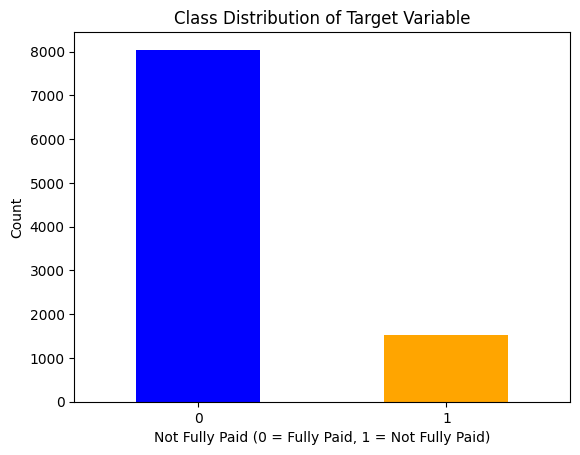

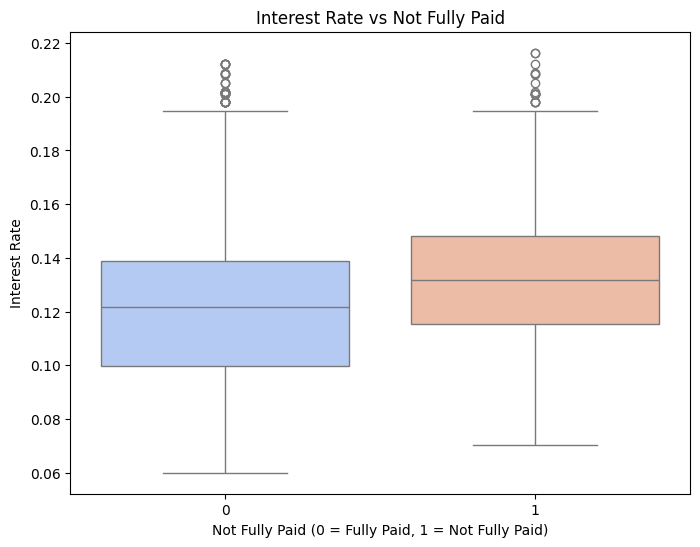

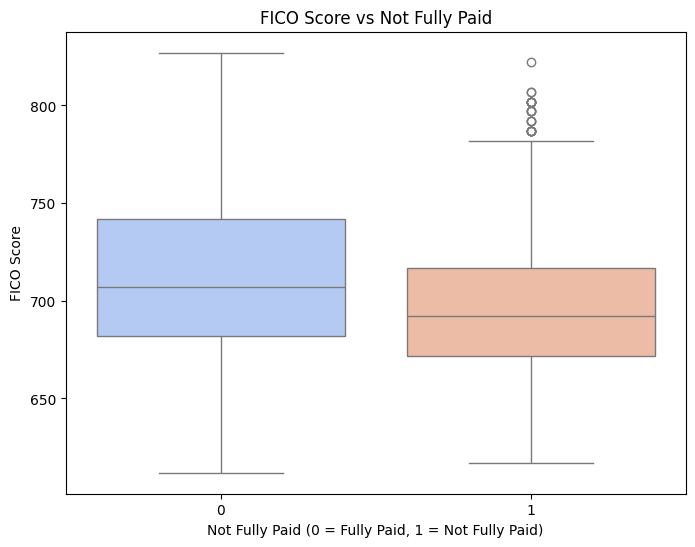

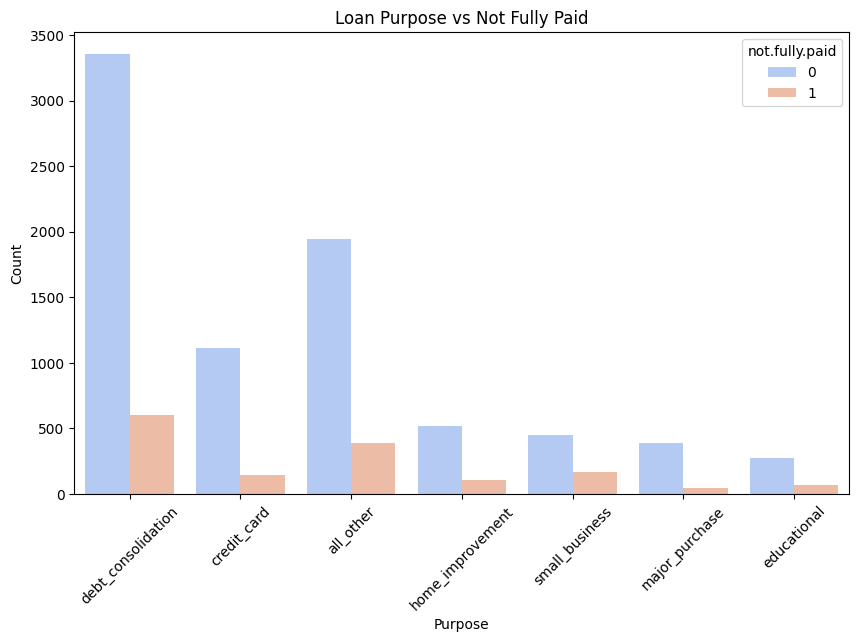

In [3]:

# Step 1: Exploratory Data Analysis (EDA)

# Check class distribution and visualize key relationships.
# Analyze int.rate, fico, and purpose for their relationship with not.fully.paid.

import matplotlib.pyplot as plt

# Check class distribution
class_counts = data['not.fully.paid'].value_counts()
print("Class Distribution:\n", class_counts)

# Bar plot for class distribution
import matplotlib.pyplot as plt
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Not Fully Paid (0 = Fully Paid, 1 = Not Fully Paid)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



# Boxplot to compare interest rates
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='not.fully.paid', y='int.rate', data=data, palette='coolwarm')
plt.title('Interest Rate vs Not Fully Paid')
plt.xlabel('Not Fully Paid (0 = Fully Paid, 1 = Not Fully Paid)')
plt.ylabel('Interest Rate')
plt.show()



# Boxplot to compare FICO scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='not.fully.paid', y='fico', data=data, palette='coolwarm')
plt.title('FICO Score vs Not Fully Paid')
plt.xlabel('Not Fully Paid (0 = Fully Paid, 1 = Not Fully Paid)')
plt.ylabel('FICO Score')
plt.show()


# Countplot for loan purpose vs not fully paid
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=data, palette='coolwarm')
plt.title('Loan Purpose vs Not Fully Paid')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()







#### Class Distribution:
* Shows an imbalance, with significantly more borrowers who fully paid (not.fully.paid = 0) than those who didn’t (not.fully.paid = 1).

#### Interest Rate (int.rate):
* Borrowers with higher int.rate are more likely to not fully pay.

#### FICO Score (fico):
* Borrowers with lower FICO scores are more likely to not fully pay.

#### Loan Purpose (purpose):
* Some purposes (e.g., credit_card, all_other, debt_consolidation) have a higher association with default than others.



In [4]:
# Step 2: Data Preprocessing

# 1. Encode Categorical Data : one-hot encoding to convert the purpose column (categorical) into numerical dummy variables
# One-hot encoding for 'purpose' column
data_encoded = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Display the updated dataframe
#print(data_encoded.head())

# 2. Scale Numerical Features
# Standardizing numerical features ensures that all features have a mean of 0 and a standard deviation of 1, which helps many machine learning models perform better.
# We’ll standardize features like int.rate, dti, and other numerical variables using StandardScaler from scikit-learn.

from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 
                  'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the scaled dataframe
# print(data_encoded.head())

# 3 Fix Boolean Columns: To ensure the Boolean columns (True/False) are converted to numerical values (0/1)
# Convert boolean columns to integers (0/1)
boolean_cols = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[boolean_cols] = data_encoded[boolean_cols].astype(int)

# Check the updated data
print(data_encoded.head())


   credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0              1 -0.139318     2.463099        0.680388  0.998505  0.688825   
1              1 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2              1  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3              1 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4              1  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.432230   0.353732    0.182704               0            0   
1          -0.721230   0.495018    1.030602               0            0   
2           0.059770  -0.397073   -0.730683               1            0   
3          -0.745277   0.496321    0.909966               1            0   
4          -0.198161  -0.360663   -0.251586               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consol

In [5]:
# Step 3: Train-Test Split and Model Training
''' Now that the data has been preprocessed, we will:
Split the data into training and testing sets.
Train machine learning models:
Logistic Regression
Decision Tree
Random Forest
Compare the models performance. ''' 

# 1. Train-Test Split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop(columns=['not.fully.paid'])
y = data_encoded['not.fully.paid']

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")





Training Set Shape: (7183, 18)
Test Set Shape: (2395, 18)


In [6]:
# 2. Model Training and Evaluation

# Train three models and evaluate their accuracy on the test data:
# 1. Logistic Regression
# 2. Decision Tree
# 3. Random Forest

# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")





Logistic Regression Accuracy: 0.84


In [7]:
# 2. Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Decision Tree Accuracy: 0.74


In [8]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.84


                       Feature  Importance
4                          dti    0.113218
2                  installment    0.112810
6            days.with.cr.line    0.112251
8                   revol.util    0.111554
3               log.annual.inc    0.111511
7                    revol.bal    0.109895
1                     int.rate    0.104210
5                         fico    0.079485
9               inq.last.6mths    0.054102
0                credit.policy    0.015238
13  purpose_debt_consolidation    0.013891
10                 delinq.2yrs    0.013656
11                     pub.rec    0.010078
17      purpose_small_business    0.009059
15    purpose_home_improvement    0.008701
12         purpose_credit_card    0.008105
14         purpose_educational    0.007307
16      purpose_major_purchase    0.004929


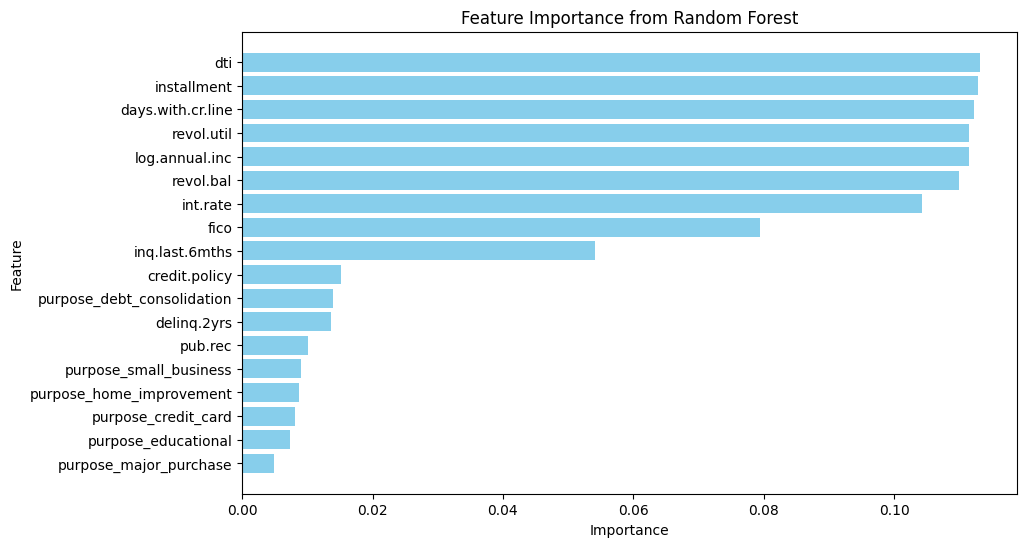

In [9]:
# Analyzing Feature Importance
# Feature importance helps us understand which variables have the most impact on the model’s predictions. 
# This is particularly insightful for models like Decision Tree and Random Forest, as they naturally provide a measure of feature importance.

# Get feature importance from Random Forest model
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


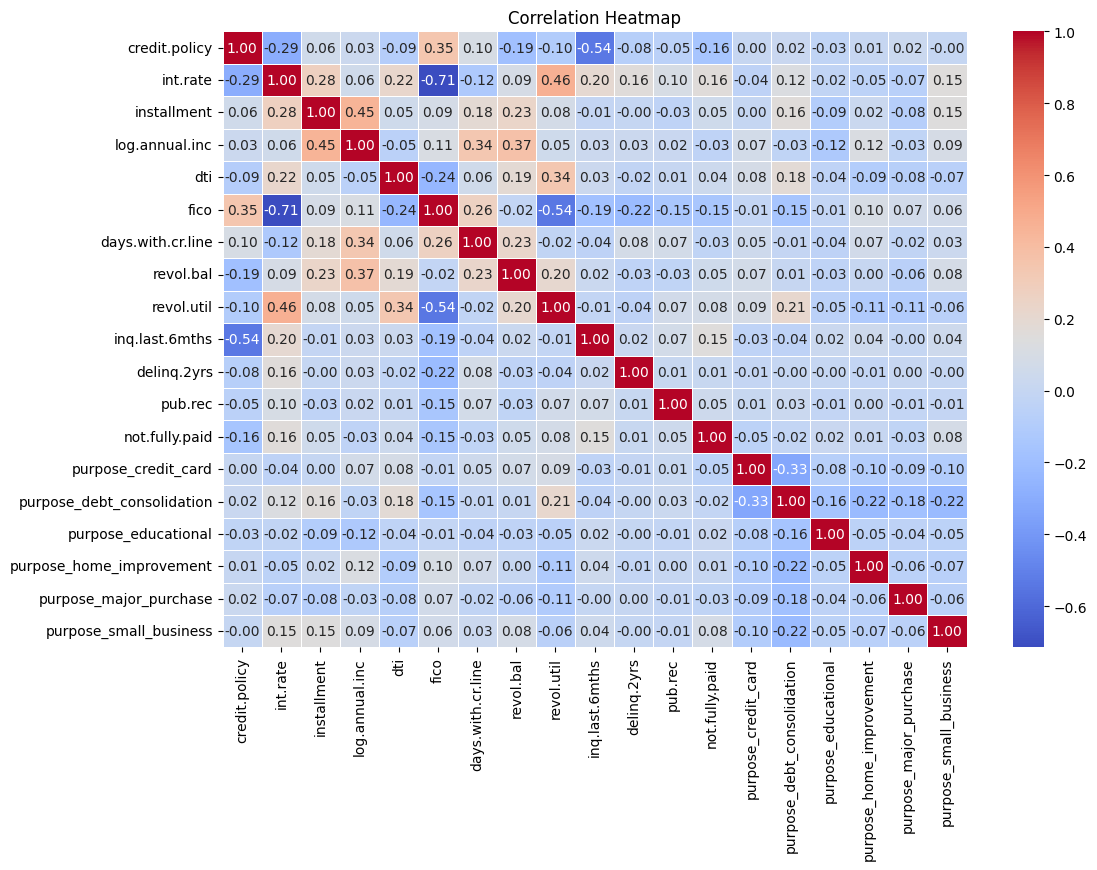

In [10]:
# Analyzing Feature Correlation with a Heatmap
# Features with high correlations might be redundant and could be candidates for removal to simplify the model without sacrificing performance

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()
# print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# Reevaluate Using Cross-Validation and Fine-Tune Hyperparameters
# Cross-validation ensures the model's performance is consistent across different splits of the data, while hyperparameter tuning optimizes the model for better results.


# Cross-Validation for Logistic Regression
# Logistic Regression has minimal hyperparameters to tune, so we'll evaluate its performance using cross-validation.

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
log_cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='accuracy')

print(f"Logistic Regression Cross-Validation Scores: {log_cv_scores}")
print(f"Mean CV Accuracy: {log_cv_scores.mean():.2f}\n")


# Fine-Tuning Decision Tree
# Decision Tree has several hyperparameters that can be fine-tuned, such as:
# max_depth: Maximum depth of the tree.
# min_samples_split: Minimum samples required to split an internal node.
# min_samples_leaf: Minimum samples required to be at a leaf node.
# GridSearchCV to find the best combination.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_
print(f"Best Parameters for Decision Tree: {best_params_dt}")

# Evaluate on test set
dt_accuracy = best_dt_model.score(X_test, y_test)
print(f"Decision Tree Accuracy After Tuning: {dt_accuracy:.2f}\n")



# Fine-Tuning Random Forest
# Random Forest has multiple hyperparameters to tune:

# n_estimators: Number of trees in the forest.
# max_depth: Maximum depth of each tree.
# min_samples_split: Minimum samples required to split a node.
# min_samples_leaf: Minimum samples at a leaf node.

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250, 300, None],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, None],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, None]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
print(f"Best Parameters for Random Forest: {best_params_rf}")

# Evaluate on test set
rf_accuracy = best_rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy After Tuning: {rf_accuracy:.2f}")



Logistic Regression Cross-Validation Scores: [0.83977035 0.83924843 0.83977035 0.84125326 0.29556136]
Mean CV Accuracy: 0.73

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Accuracy After Tuning: 0.84

Fitting 5 folds for each of 1372 candidates, totalling 6860 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy After Tuning: 0.84


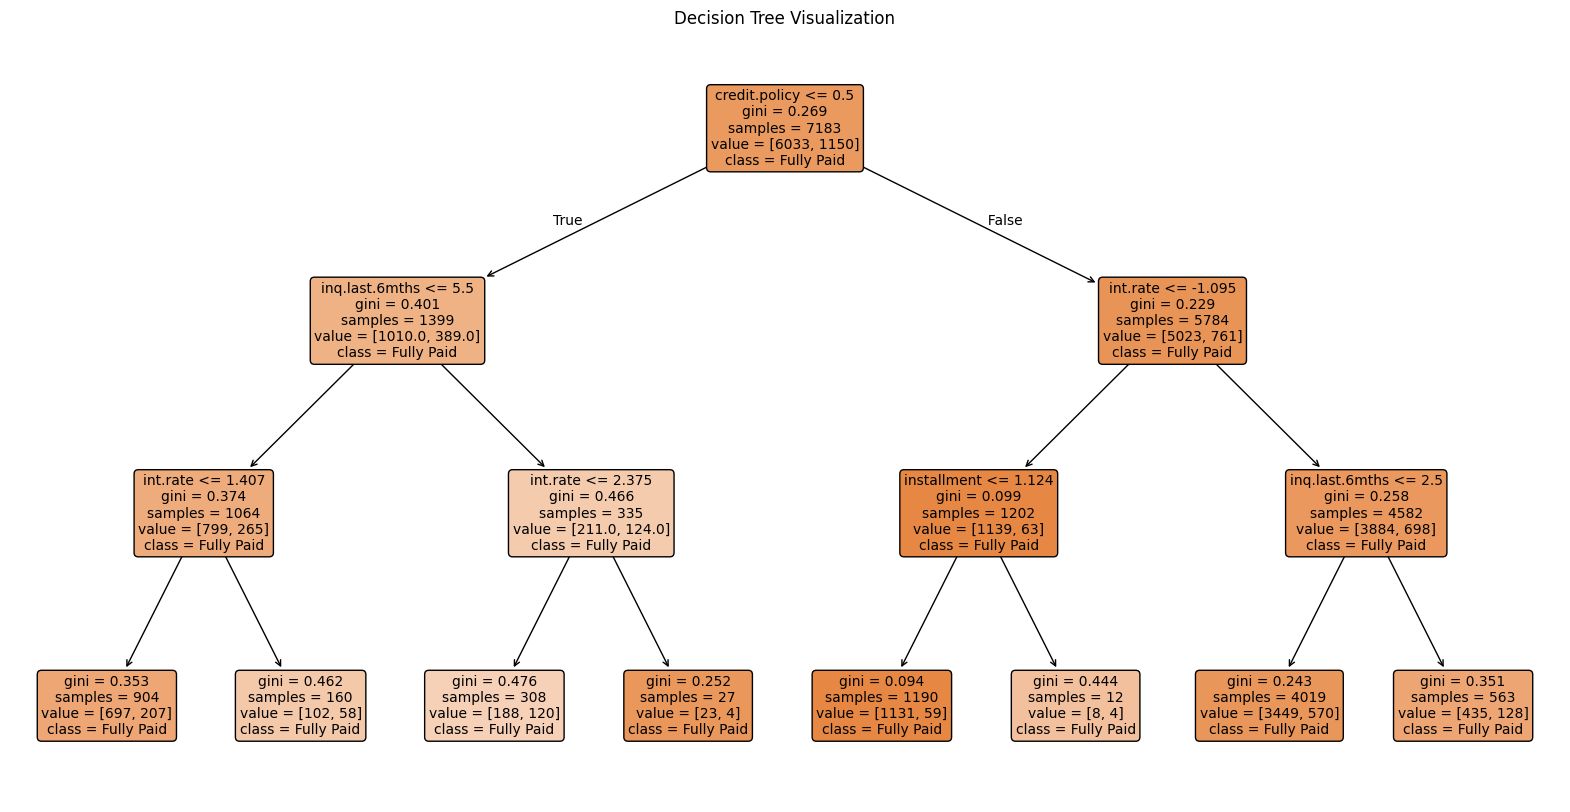

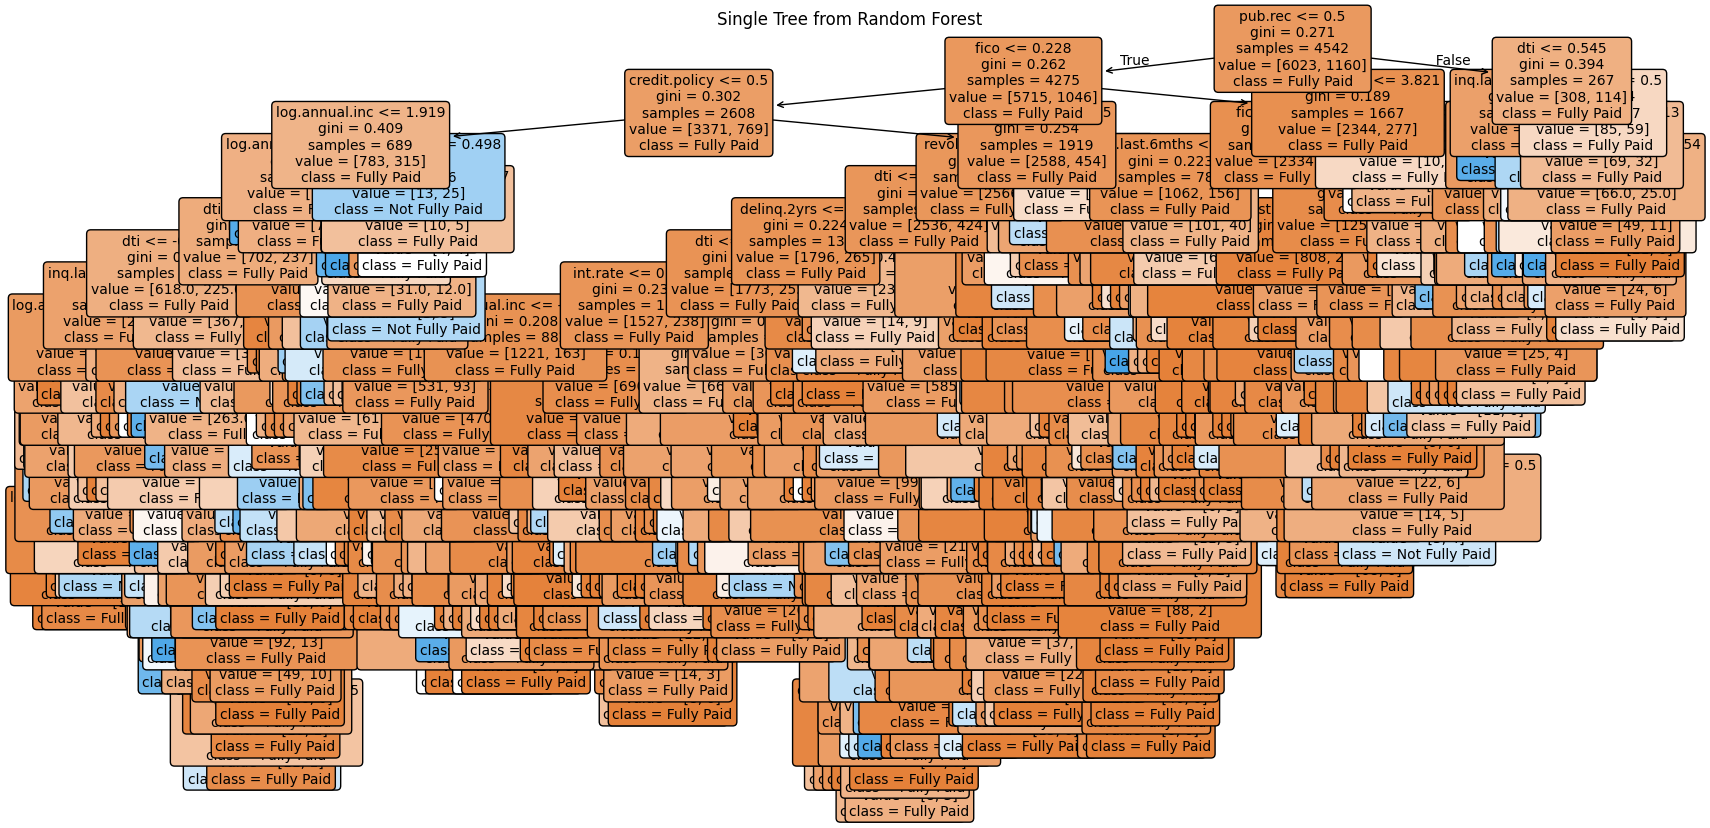

In [12]:
# Plotting the Decision Tree
# Visualizing a Decision Tree helps us understand how the model splits data at each level. 

from sklearn.tree import plot_tree

# Plot the best Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model, 
    feature_names=X.columns, 
    class_names=['Fully Paid', 'Not Fully Paid'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()




# Plotting a Single Tree from Random Forest
# Random Forest is an ensemble of multiple trees. Visualize one specific tree from the fores

# Extract a single tree from the Random Forest
single_tree = best_rf_model.estimators_[0]

# Plot the single tree
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree, 
    feature_names=X.columns, 
    class_names=['Fully Paid', 'Not Fully Paid'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Single Tree from Random Forest")
plt.show()



In [13]:
#

# Check class distribution
class_counts = data_encoded['not.fully.paid'].value_counts()
print("Class Distribution:\n", class_counts)



Class Distribution:
 not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


In [43]:
# 1. Train a Weighted Decision Tree
# We’ll use class_weight to assign more importance to the minority class (Not Fully Paid).

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'max_depth': [6],
    'min_samples_split': [2, 4, 6, 8, 10, None],
    'min_samples_leaf': [1, 2, 4, None]
}

# Initialize Decision Tree with class weighting
dt_weighted = DecisionTreeClassifier(random_state=42, class_weight={0: 1, 1: 5})

# Perform Grid Search for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=dt_weighted, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_
print(f"Best Parameters for Decision Tree: {best_params_dt}")

# Evaluate the best Decision Tree model on the test set
y_pred_best = best_dt_model.predict(X_test)

print("Decision Tree Performance After Hyperparameter Tuning:")
print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for Decision Tree: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}
Decision Tree Performance After Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      2012
           1       0.24      0.49      0.32       383

    accuracy                           0.67      2395
   macro avg       0.56      0.60      0.55      2395
weighted avg       0.78      0.67      0.71      2395

Accuracy: 0.67


In [17]:
! pip install imblearn

In [45]:
# 2. Apply SMOTE to Balance the Dataset
# We’ll oversample the minority class to create a balanced dataset and train a Decision Tree on the resampled data.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42
)

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 10],
    'min_samples_leaf': [1, 2, 4, None]
}

# Initialize a Decision Tree Classifier
dt_smote = DecisionTreeClassifier(random_state=42)

# Perform Grid Search on SMOTE-resampled data
grid_search_dt = GridSearchCV(estimator=dt_smote, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Retrieve the best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_
print(f"Best Parameters for Decision Tree: {best_params_dt}")

# Evaluate the best Decision Tree model on the SMOTE-resampled test set
y_pred_smote = best_dt_model.predict(X_test_resampled)

print("SMOTE Decision Tree Performance:")
print(classification_report(y_test_resampled, y_pred_smote))
print(f"Accuracy: {accuracy_score(y_test_resampled, y_pred_smote):.2f}")



Fitting 5 folds for each of 112 candidates, totalling 560 fits
Best Parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
SMOTE Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      2019
           1       0.73      0.71      0.72      2004

    accuracy                           0.73      4023
   macro avg       0.73      0.73      0.73      4023
weighted avg       0.73      0.73      0.73      4023

Accuracy: 0.73


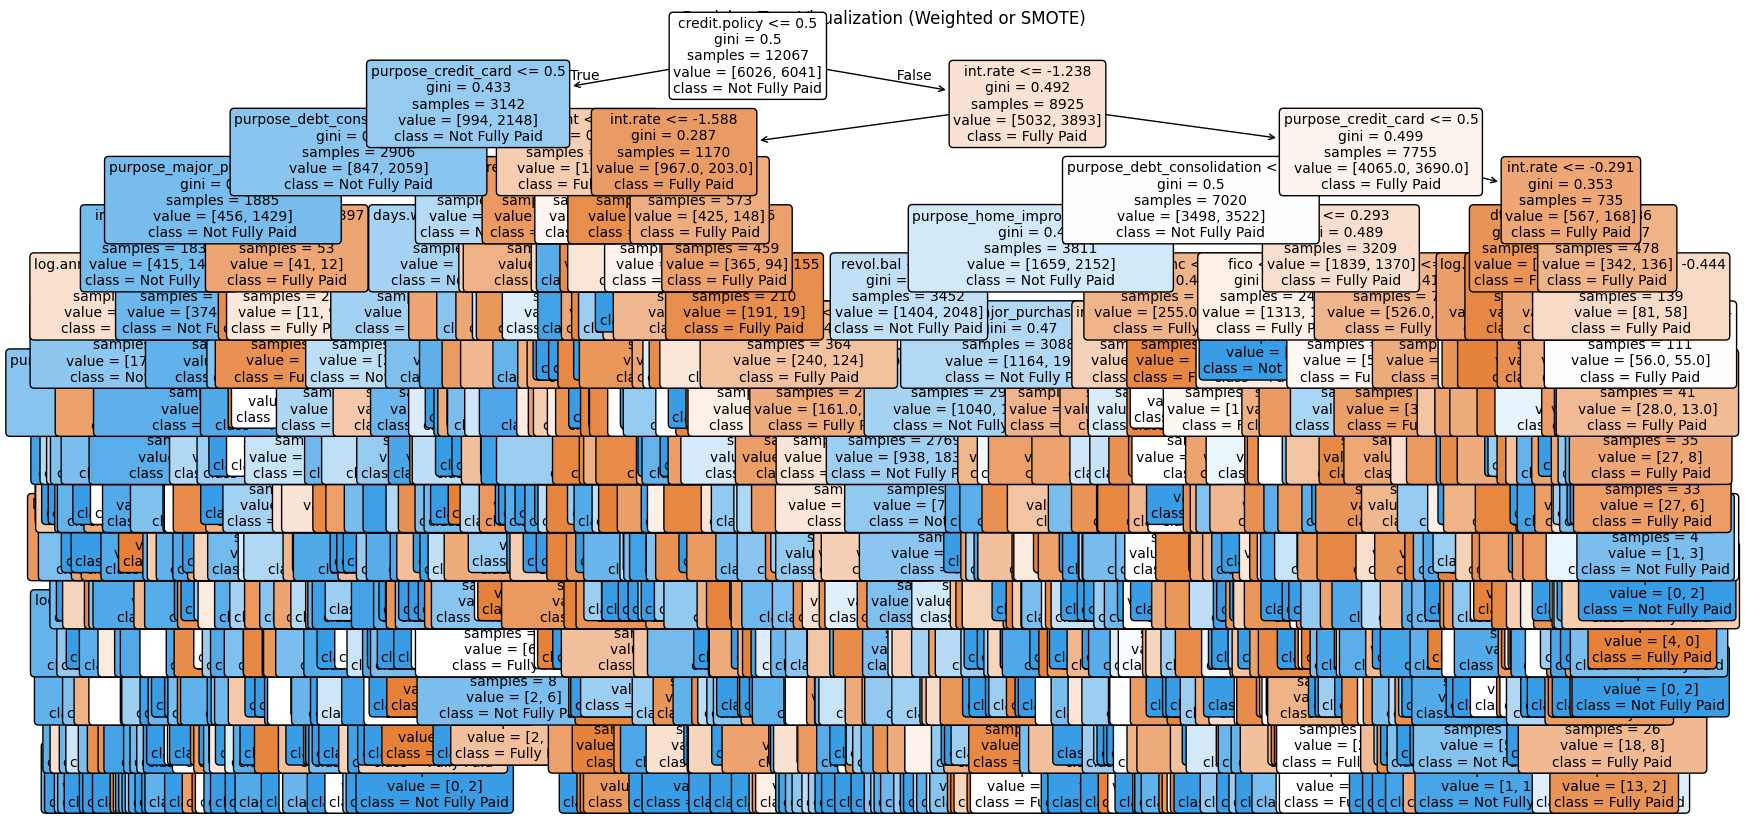

In [46]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the tree trained with oversample the minority class or  with weighting
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_model,  # Use dt_smote for SMOTE
    feature_names=X.columns,
    class_names=['Fully Paid', 'Not Fully Paid'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Weighted or SMOTE)")
plt.show()



In [47]:
# Random Forest with Class Weight

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 5})

# Perform Grid Search
grid_search_rf_weighted = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf_weighted.fit(X_train, y_train)

# Best parameters and evaluation
best_params_rf_weighted = grid_search_rf_weighted.best_params_
best_rf_weighted = grid_search_rf_weighted.best_estimator_
print(f"Best Parameters for Weighted Random Forest: {best_params_rf_weighted}")

y_pred_best_weighted = best_rf_weighted.predict(X_test)
print("Weighted Random Forest After Tuning Performance:")
print(classification_report(y_test, y_pred_best_weighted))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_weighted):.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Weighted Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Weighted Random Forest After Tuning Performance:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.60      0.01      0.02       383

    accuracy                           0.84      2395
   macro avg       0.72      0.50      0.46      2395
weighted avg       0.80      0.84      0.77      2395

Accuracy: 0.84


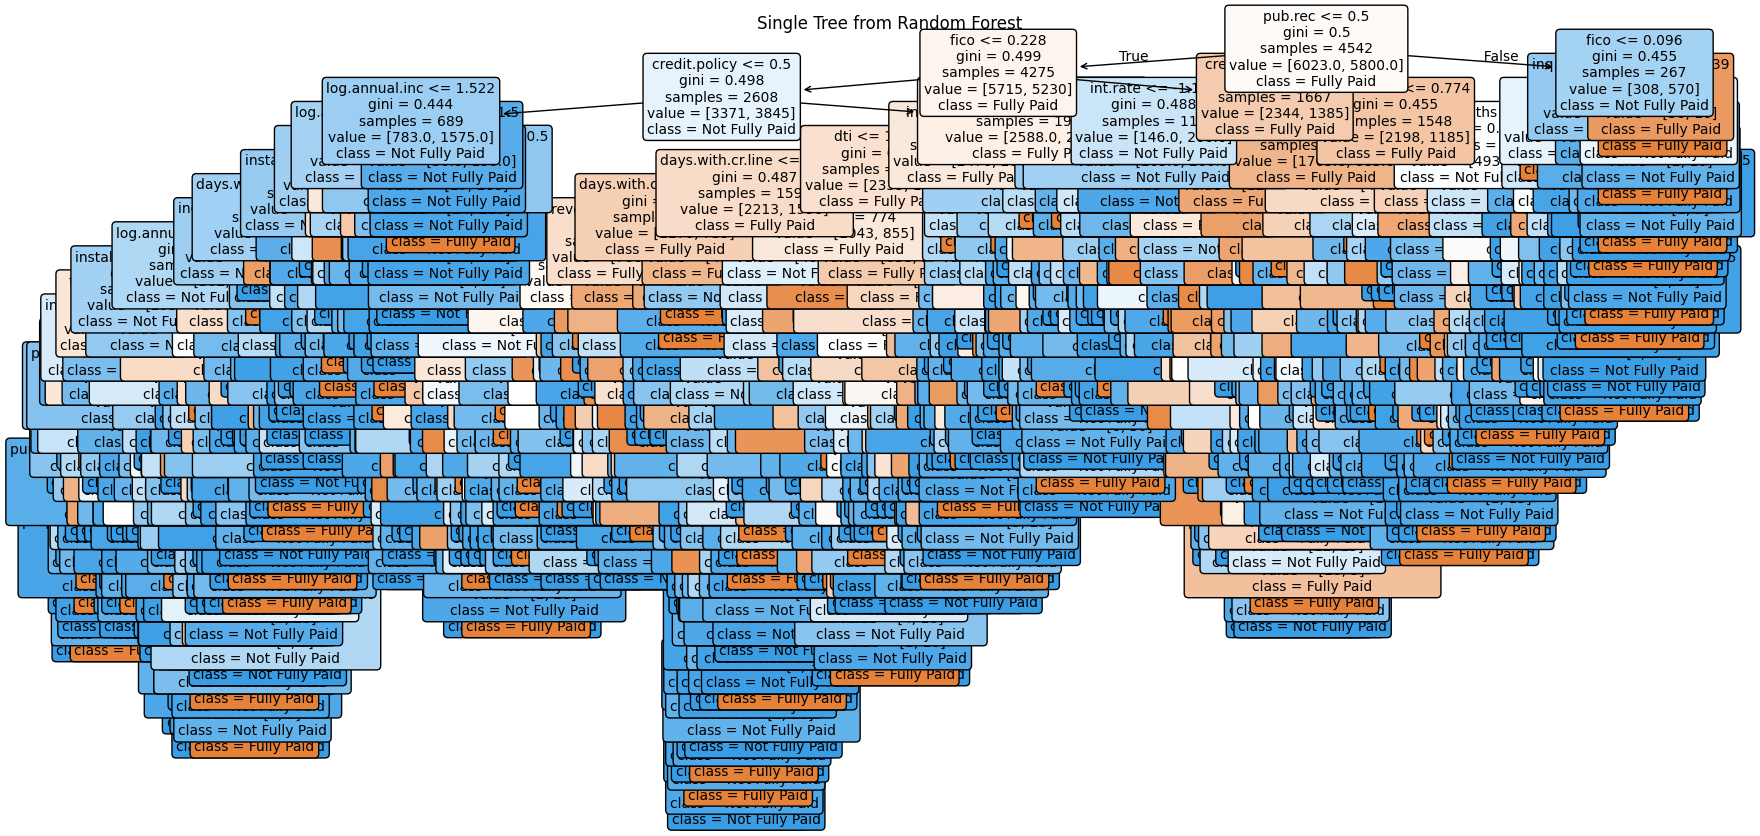

In [50]:
# Plotting a Single Tree from Random Forest
# Random Forest is an ensemble of multiple trees. Visualize one specific tree from the fores

# Extract a single tree from the Random Forest
single_tree = best_rf_weighted.estimators_[0]

# Plot the single tree
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree, 
    feature_names=X.columns, 
    class_names=['Fully Paid', 'Not Fully Paid'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Single Tree from Random Forest")
plt.show()

In [53]:
# 


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest (no need to pass specific hyperparameters here)
rf_smote = RandomForestClassifier(random_state=42)

# Perform Grid Search for SMOTE data
grid_search_rf_smote = GridSearchCV(estimator=rf_smote, param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf_smote.fit(X_train_resampled, y_train_resampled)

# Best parameters and evaluation
best_params_rf_smote = grid_search_rf_smote.best_params_
best_rf_smote = grid_search_rf_smote.best_estimator_

print(f"Best Parameters for SMOTE Random Forest: {best_params_rf_smote}")

# Evaluate the tuned model on the resampled test data
y_pred_best_smote = best_rf_smote.predict(X_test_resampled)

print("SMOTE Random Forest After Tuning Performance:")
print(classification_report(y_test_resampled, y_pred_best_smote))
print(f"Accuracy: {accuracy_score(y_test_resampled, y_pred_best_smote):.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for SMOTE Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
SMOTE Random Forest After Tuning Performance:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2019
           1       0.87      0.89      0.88      2004

    accuracy                           0.88      4023
   macro avg       0.88      0.88      0.88      4023
weighted avg       0.88      0.88      0.88      4023

Accuracy: 0.88


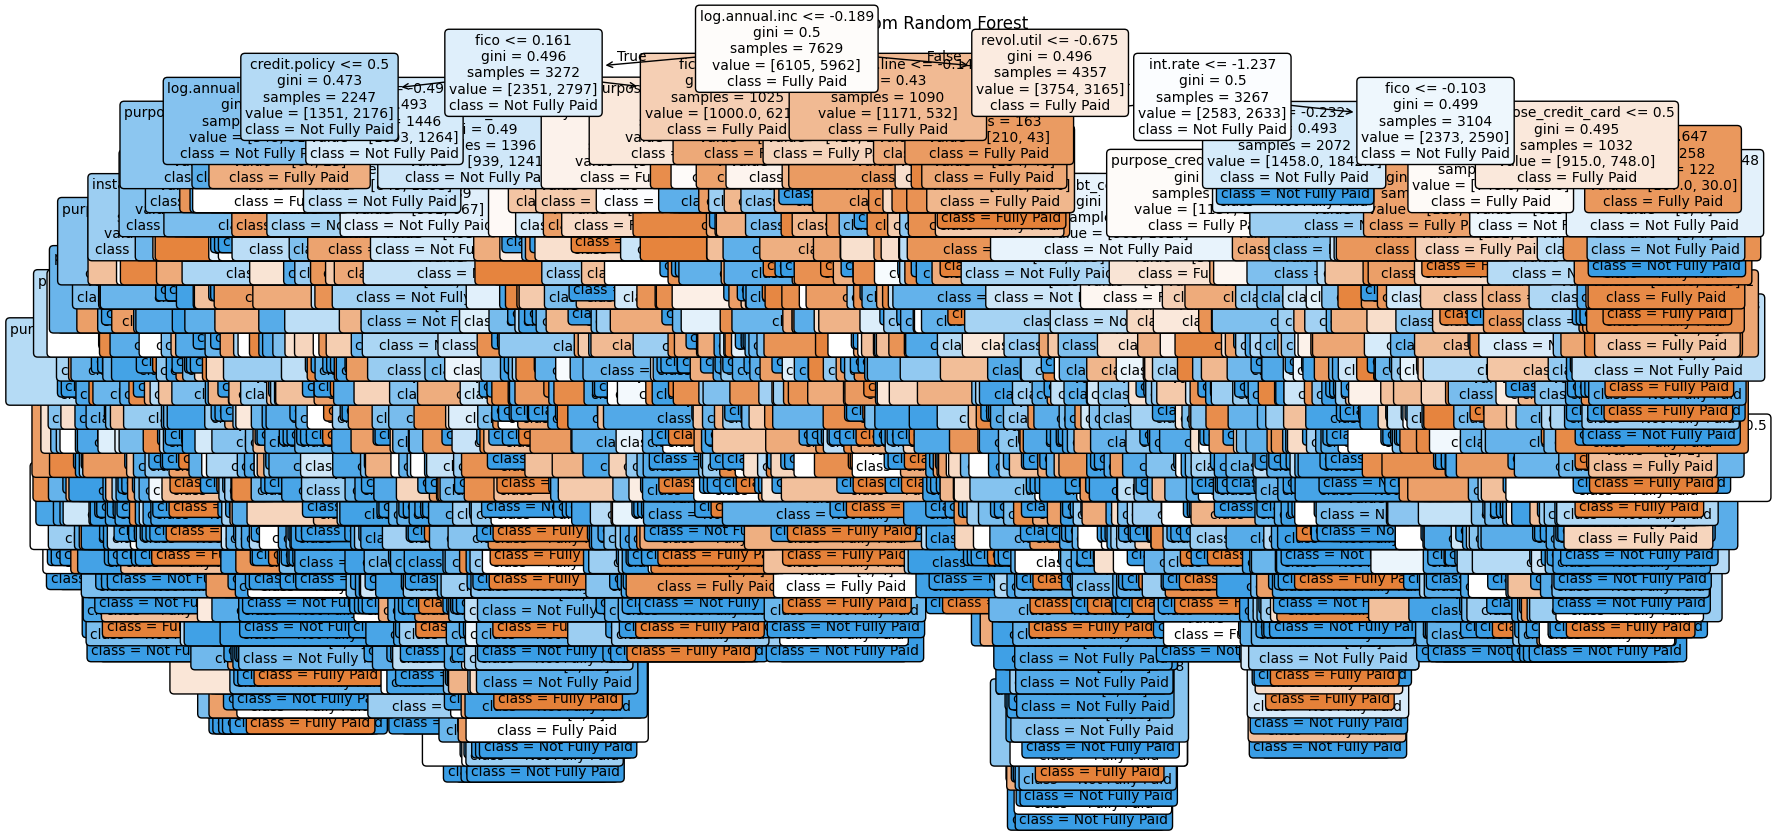

In [56]:
# 
# Plotting a Single Tree from Random Forest
# Random Forest is an ensemble of multiple trees. Visualize one specific tree from the fores

# Extract a single tree from the Random Forest
single_tree = best_rf_smote.estimators_[0]

# Plot the single tree
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree, 
    feature_names=X.columns, 
    class_names=['Fully Paid', 'Not Fully Paid'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Single Tree from Random Forest")
plt.show()

In [14]:
# 
# Date: 24-11-2024
# Programmer: Mr A. M. 
